In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Normalize the data frame values such that the std of each column will be approximately 1
def norm_fun(df):
    for k in df.columns.values:
        col_mean=df[k].mean()
        col_len=len(df)
        Denom=np.sqrt(1/col_len*np.sum((df[k]-col_mean)**2))
        df[k] = df[k].apply(lambda x: x/Denom)
    return df

In [7]:
d_test=pd.read_pickle('d_test.pkl')
d_test.reset_index(inplace=True,drop=True)

d_train=pd.read_pickle('d_train.pkl')
d_train.reset_index(inplace=True,drop=True)

X=d_train.iloc[:,0:6]
X_train=norm_fun(X)

y_train=d_train['y_train']
y_train=np.log(y_train)


X_test=d_test.iloc[:,0:6]
X_test=norm_fun(X_test)

y_test=d_test['y_test']
y_test=np.log(y_test)

In [8]:
poly = PolynomialFeatures(5,include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly_feature_name = poly.get_feature_names(['Feature'+str(l) for l in range(1,7)])
print(X_poly_feature_name)
print(len(X_poly_feature_name))

['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature1^2', 'Feature1 Feature2', 'Feature1 Feature3', 'Feature1 Feature4', 'Feature1 Feature5', 'Feature1 Feature6', 'Feature2^2', 'Feature2 Feature3', 'Feature2 Feature4', 'Feature2 Feature5', 'Feature2 Feature6', 'Feature3^2', 'Feature3 Feature4', 'Feature3 Feature5', 'Feature3 Feature6', 'Feature4^2', 'Feature4 Feature5', 'Feature4 Feature6', 'Feature5^2', 'Feature5 Feature6', 'Feature6^2', 'Feature1^3', 'Feature1^2 Feature2', 'Feature1^2 Feature3', 'Feature1^2 Feature4', 'Feature1^2 Feature5', 'Feature1^2 Feature6', 'Feature1 Feature2^2', 'Feature1 Feature2 Feature3', 'Feature1 Feature2 Feature4', 'Feature1 Feature2 Feature5', 'Feature1 Feature2 Feature6', 'Feature1 Feature3^2', 'Feature1 Feature3 Feature4', 'Feature1 Feature3 Feature5', 'Feature1 Feature3 Feature6', 'Feature1 Feature4^2', 'Feature1 Feature4 Feature5', 'Feature1 Feature4 Feature6', 'Feature1 Feature5^2', 'Feature1 Feature5 Feature6', 'Featur

In [9]:
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,...,Feature4 Feature5^3 Feature6,Feature4 Feature5^2 Feature6^2,Feature4 Feature5 Feature6^3,Feature4 Feature6^4,Feature5^5,Feature5^4 Feature6,Feature5^3 Feature6^2,Feature5^2 Feature6^3,Feature5 Feature6^4,Feature6^5
0,0.882001,5.376612,2.573672,129.165553,8.438358,3.144715,0.777925,4.742175,2.269981,113.924090,...,244062.927828,90954.715102,33896.013102,12631.997175,42784.812669,15944.578235,5942.051846,2214.419197,825.245641,307.543562
1,0.027190,5.777273,2.911467,128.746844,5.924804,2.358536,0.000739,0.157084,0.079163,3.500628,...,63154.050266,25140.261509,10007.794370,3983.886489,7300.793159,2906.287854,1156.930337,460.548945,183.334574,72.981529
2,2.230513,6.119773,0.546905,129.787273,8.707667,0.786179,4.975189,13.650236,1.219880,289.492231,...,67368.808770,6082.447893,549.158773,49.581248,50062.097088,4519.897302,408.082617,36.844072,3.326497,0.300336
3,1.413881,6.249019,2.573672,129.165553,8.438358,3.144715,1.999059,8.835367,3.638866,182.624687,...,244062.927828,90954.715102,33896.013102,12631.997175,42784.812669,15944.578235,5942.051846,2214.419197,825.245641,307.543562
4,2.880885,7.231285,1.142067,128.594586,8.169048,0.786179,8.299500,20.832501,3.290164,370.466254,...,55113.553910,5304.058284,510.455819,49.125618,36379.550476,3501.121637,336.943490,32.427013,3.120734,0.300336


In [10]:
df_poly['y']=y_train
df_poly.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature1^2,Feature1 Feature2,Feature1 Feature3,Feature1 Feature4,...,Feature4 Feature5^2 Feature6^2,Feature4 Feature5 Feature6^3,Feature4 Feature6^4,Feature5^5,Feature5^4 Feature6,Feature5^3 Feature6^2,Feature5^2 Feature6^3,Feature5 Feature6^4,Feature6^5,y
0,0.882001,5.376612,2.573672,129.165553,8.438358,3.144715,0.777925,4.742175,2.269981,113.924090,...,90954.715102,33896.013102,12631.997175,42784.812669,15944.578235,5942.051846,2214.419197,825.245641,307.543562,4.215086
1,0.027190,5.777273,2.911467,128.746844,5.924804,2.358536,0.000739,0.157084,0.079163,3.500628,...,25140.261509,10007.794370,3983.886489,7300.793159,2906.287854,1156.930337,460.548945,183.334574,72.981529,4.371976
2,2.230513,6.119773,0.546905,129.787273,8.707667,0.786179,4.975189,13.650236,1.219880,289.492231,...,6082.447893,549.158773,49.581248,50062.097088,4519.897302,408.082617,36.844072,3.326497,0.300336,3.912023
3,1.413881,6.249019,2.573672,129.165553,8.438358,3.144715,1.999059,8.835367,3.638866,182.624687,...,90954.715102,33896.013102,12631.997175,42784.812669,15944.578235,5942.051846,2214.419197,825.245641,307.543562,4.268298
4,2.880885,7.231285,1.142067,128.594586,8.169048,0.786179,8.299500,20.832501,3.290164,370.466254,...,5304.058284,510.455819,49.125618,36379.550476,3501.121637,336.943490,32.427013,3.120734,0.300336,4.110874


In [11]:
X_train=df_poly.drop('y',axis=1)
y_train=df_poly['y']

In [16]:
LAS_model = LassoCV(cv=10,verbose=0,normalize=True,eps=0.001,n_alphas=100, tol=0.0001,max_iter=5000)

In [17]:
LAS_model.fit(X_train,y_train)

C:\Users\20180754\AppData\Local\Continuum\anaconda2\envs\orange3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\20180754\AppData\Local\Continuum\anaconda2\envs\orange3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\20180754\AppData\Local\Continuum\anaconda2\envs\orange3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\20180754\AppData\Local\Continuum\a

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=5000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=0)

In [20]:
poly = PolynomialFeatures(5,include_bias=False)
X_poly = poly.fit_transform(X_test)
X_poly_feature_name = poly.get_feature_names(['Feature'+str(l) for l in range(1,7)])
df_poly = pd.DataFrame(X_poly, columns=X_poly_feature_name)
df_poly['y']=y_test
X_test=df_poly.drop('y',axis=1)
y_test=df_poly['y']

In [21]:
y_predicted = np.array(LAS_model.predict(X_test))

In [24]:
coeff1 = pd.DataFrame(LAS_model.coef_,index=df_poly.drop('y',axis=1).columns, columns=['Coefficients Metamodel'])
coeff1

In [40]:
# coeff1[coeff1['Coefficients Metamodel']!=0]

MAE= 7.916494607110858


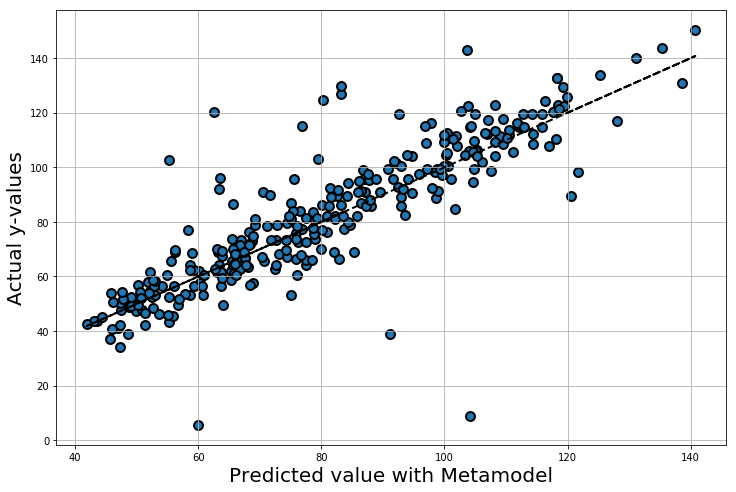

In [35]:
print("MAE=",metrics.mean_absolute_error(np.exp(y_test[1:300].values),np.exp(y_predicted[1:300])))
plt.figure(figsize=(12,8))
plt.xlabel("Predicted value with Metamodel",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(np.exp(y_predicted[1:300]),np.exp(y_test[1:300]),edgecolors=(0,0,0),lw=2,s=80)
plt.plot(np.exp(y_predicted[1:300]),np.exp(y_predicted[1:300]), 'k--', lw=2)

(3.4459364526967313,
 6.745936452696732,
 0.04340374078233129,
 0.12330569416731475)

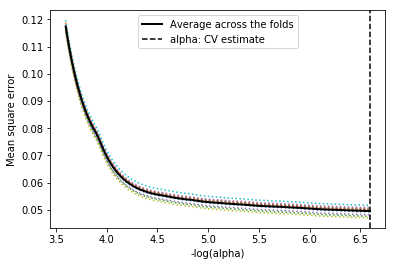

In [37]:
# Display results
m_log_alphas = -np.log10(LAS_model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, LAS_model.mse_path_, ':')
plt.plot(m_log_alphas, LAS_model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(LAS_model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.axis('tight')